# Setting up the Jupyter Environment and Working with Julia 

This is just the test file for me to set up everything and make myself familar with the Julia dev environment. This file is not the part of the course.

## Plotting

The following code will generate the plot of $f(x) = \sin(x)$ and $g(x) = \cos(x)$

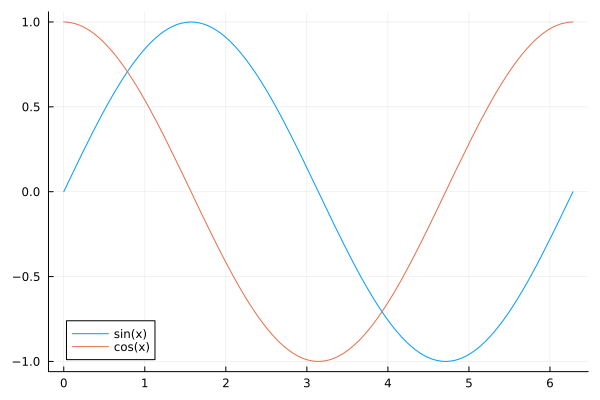

In [2]:
using Plots
plot(sin, 0, 2π, label="sin(x)")
plot!(cos, 0, 2π, label="cos(x)")

## Some stat stuff

### Random Number Generator and Hypothesis Testing

This following code will generate random number from distribution $X \sim \text{Beta}(1,2)$

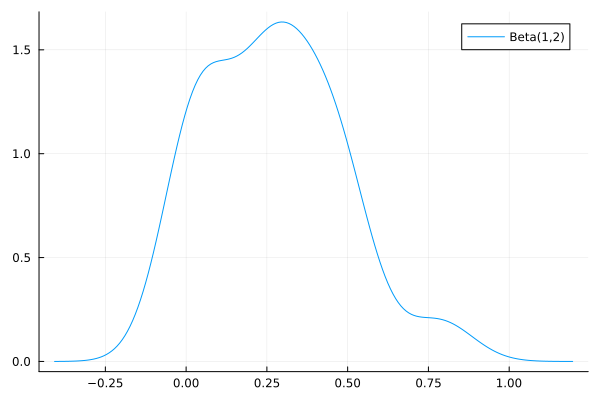

In [4]:
#generate random number from Beta(1,2) distribution
using Distributions
d = Beta(1,2) #should be triangular
#plot scatterplot of 20 random numbers
using StatsPlots
x = rand(d, 20)
density(vec(x), label="Beta(1,2)")

In [5]:
#test whether the sample X~N(0,1) or not
using HypothesisTests
normal = Normal(0,1)
ApproximateOneSampleKSTest(vec(x), normal)


Approximate one sample Kolmogorov-Smirnov test
----------------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          0.502062

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           <1e-04

Details:
    number of observations:   20
    KS-statistic:             2.2452879848530114


In [6]:
#test whether the sample X~Beta(1,2) or not
ApproximateOneSampleKSTest(vec(x), d)

Approximate one sample Kolmogorov-Smirnov test
----------------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          0.202288

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.3863

Details:
    number of observations:   20
    KS-statistic:             0.9046589491479919


### Regression stuff

Let say we have a model $Y = \beta X + \varepsilon$ where $X\in\mathbb{R}^2$ and $\varepsilon\sim \text{Beta}(1,2)$

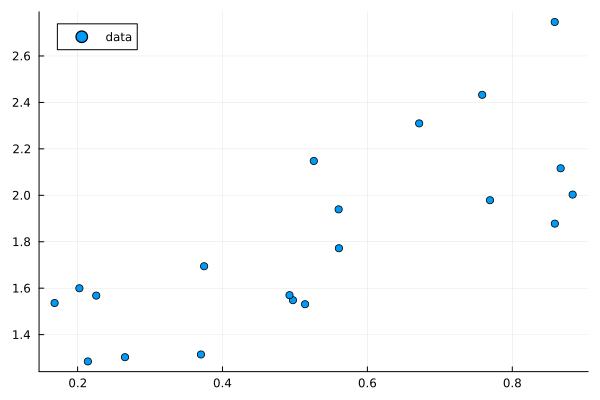

In [20]:
#generate a dataset of y = 1.2x + e where e~Beta(1,2)
x = rand(20)
y = 1.2x .+ 0.84 + rand(d, 20)
scatter(x, y, label="data")

In [23]:
#fit a linear model
using GLM, DataFrames
ols = lm(@formula(y ~ x), DataFrame(x=x, y=y))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

y ~ 1 + x

Coefficients:
──────────────────────────────────────────────────────────────────────
               Coef.  Std. Error     t  Pr(>|t|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────
(Intercept)  1.15167    0.142297  8.09    <1e-06   0.852718    1.45063
x            1.24463    0.244093  5.10    <1e-04   0.731813    1.75745
──────────────────────────────────────────────────────────────────────

In [70]:
#calculate r^2
r2(ols)

0.5909083920517869

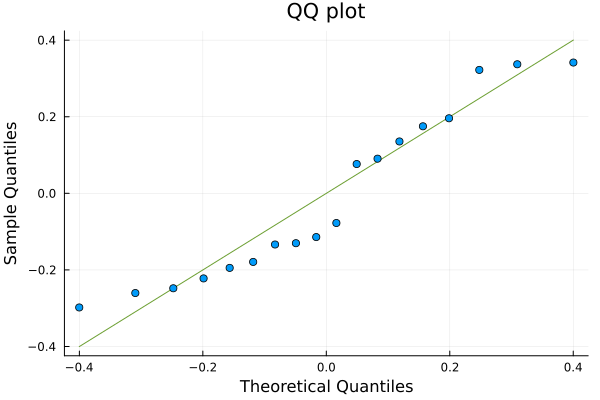

In [99]:
#make qq plot
plot(qqnorm(residuals(ols)),title = "QQ plot", xlabel = "Theoretical Quantiles", ylabel = "Sample Quantiles")

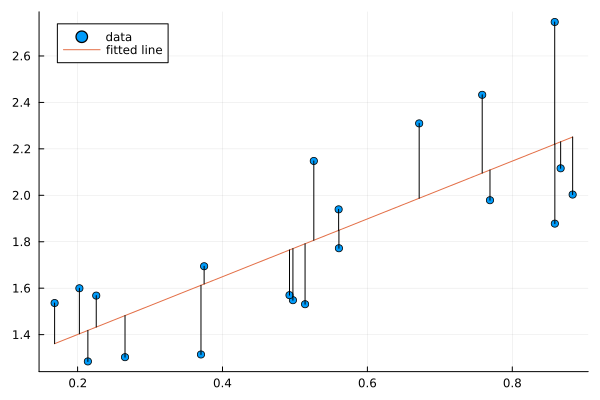

In [27]:
#plot the data and the fitted line
p = scatter(x, y, label="data")
plot!(p,x,predict(ols), label="fitted line")
#plot the residuals
for i in 1:length(x)
    plot!(p,[x[i], x[i]], [y[i], predict(ols)[i]], linewidth=1, color="black", label = "")
end
display(p)


Oh no. Linear is not enough! Our noise is not normal so maybe polynomial of degree 6 would fix it?

In [60]:
#let say the polynomial of ordered 6?
ols2 = lm(@formula(y ~ x + x^2 + x^3 + x^4 + x^5 + x^6), DataFrame(x=x, y=y))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

y ~ 1 + x + :(x ^ 2) + :(x ^ 3) + :(x ^ 4) + :(x ^ 5) + :(x ^ 6)

Coefficients:
────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)   Lower 95%   Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)     2.15286     11.7706   0.18    0.8577     -23.276     27.5817
x              -5.34687    178.682   -0.03    0.9766    -391.366    380.672
x ^ 2          14.7066    1062.55     0.01    0.9892   -2280.8     2310.21
x ^ 3         -40.3986    3177.98    -0.01    0.9901   -6906.0     6825.21
x ^ 4         109.884     5069.82     0.02    0.9830  -10842.8    11062.6
x ^ 5        -130.369     4111.68    -0.03    0.9752   -9013.11    8752.37
x ^ 6          51.0817    1330.66     0.04  

In [68]:
#calculate the R^2
r2(ols2)

0.6844211756808788

In [61]:
#access coefficient in a vector format
c = coef(ols2)
#make a function for the polynomial of size N
f(t) = sum([c[i]*t^(i-1) for i in 1:length(c)])

f (generic function with 1 method)

In [66]:
xspace = range(0, stop=1, length=100)
yspace = f.(xspace);

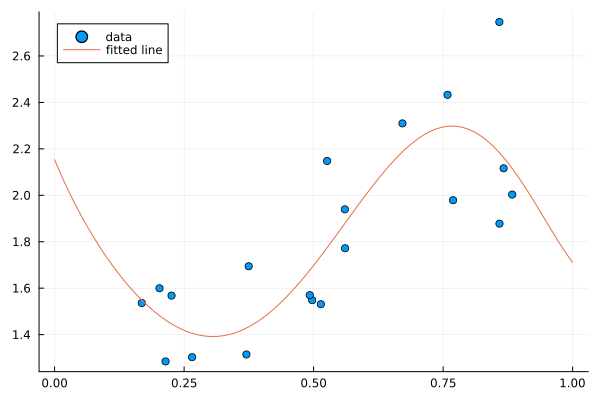

In [67]:
#plot the data and the fitted line
p = scatter(x, y, label="data")
plot!(p,xspace,yspace, label="fitted line")
display(p)

How about using deep learning for regression?